### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [1]:
import numpy as np # importing convention

In [2]:
m= np.arange(12)
print('original m:', m)
m = m.reshape((3,4))
print ('reshaped m:',m)
print('m\'s rows:', m.shape[0])
print('m\'s columns:', m.shape[1])
print('m\'s mean:', np.mean(m))

original m: [ 0  1  2  3  4  5  6  7  8  9 10 11]
reshaped m: [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
m's rows: 3
m's columns: 4
m's mean: 5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [ ]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
print('numpy\'s function:',np.outer(u,v))
outer_2=[u[i]*v[j] for i in range(u.size) for j in range(v.size)] #è equivalente a for i for j
outer_2_array=np.array(outer_2).reshape(4,4)
print(v.size)
print('list comprehension',outer_2)
print(outer_2_array)
print(v.reshape((4,1)))
outer_3=u*v.reshape(4,1) #broadcasting

                  
print('broadcasting:',outer_3)
outer_4=u.reshape(4,1)*v
print(outer_4)

3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [ ]:
random_numbers= np.random.random((10,6))
print(random_numbers)
print(np.greater(random_numbers,0.1)) #più facile cosi, np.any non riesco a farlo andare
random_numbers[np.less(random_numbers,0.1)]=0
print(random_numbers)



4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

In [ ]:
numbers= np.linspace(0,2*np.pi, 100)
print(numbers)
n_sliced= numbers[::10]
print(n_sliced)
n_reversed= numbers[::-1]
print(n_reversed)


In [3]:
import matplotlib.pyplot as plt
idx = np.abs(np.sin(numbers)-np.cos(numbers)) < 0.1
print(idx)
print(numbers[idx])
plt.scatter(numbers[idx], np.sin(numbers[idx]))
plt.plot(numbers, np.sin(numbers), numbers, np.cos(numbers));

NameError: name 'numbers' is not defined

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [ ]:
v1= np.arange(1,11)
v2= np.arange(1,11)
outer_product=np.outer(v1,v2)
print(np.outer(v1,v2))
traccia=np.trace(outer_product)
print(traccia)
diag1=np.diag(outer_product[::-1])
diag2=np.diag(outer_product,1)
print(diag2)
print(diag1)

6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [ ]:
route66=np.array([0,198, 303, 736, 871,1175, 1475, 1544, 1913, 2448])
route66_t=route66[:,np.newaxis]
print(route66[:,np.newaxis])
distances=route66-route66_t
print(distances)
km=1.6
converted=distances/km
print(converted)

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [11]:
def numeriPrimi(N):
    
    setaccio=np.arange(0,N)
    mask = (setaccio%2==0)
    print(mask)
    for i in setaccio:
        if i:
            
            mask = (setaccio%i==0)
    print(mask)
    return setaccio[mask]
#%timeit numeriPrimi(100)



In [ ]:
def numeriPrimi_v2(N):
    
    setaccio=np.arange(0,N)
    primi=[]
    print(setaccio.shape)
    i=2
    while i < np.square(N):
        if setaccio[i] > 0:
            primi.append(i)
            j=i**2
            while j < N:
                setaccio[j]= -1
                j=j + i
                
    
    return primi
numeriPrimi_v2(10)

8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

In [38]:
prova=np.random.choice([5, 3], size=(2,2))
print(prova.shape)
prova[1,1]



(2, 2)


5

In [61]:
n_w= 1000
n_s= 200
r_w=np.random.choice([-1,1],size=(n_w,n_s))
print(r_w.shape)
val_ass=np.absolute(r_w)
distance=np.zeros((n_w,n_s))
print(np.sum(val_ass[0:3,0:2], axis=1).shape)
print(distance)

#for i in range(n_s):
#    distance[0:3,i]=np.sum(val_ass[0:3,0:i], axis=1)


(1000, 200)
(3,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

(21, 4)


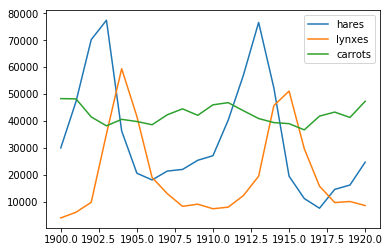

In [8]:
import matplotlib.pyplot as plt
filename = 'populations.txt'
data=np.loadtxt(filename)
print(data.shape)
hares=data[:,1]
lynxes=data[:,2]
carrots=data[:,3]
year=data[:,0]
plt.plot(year, hares,label='hares')
plt.plot(year, lynxes, label='lynxes')
plt.plot(year, carrots, label='carrots')
plt.legend()

In [12]:
corr_hl=np.correlate(hares,lynxes)
print(corr_hl)
corr_hc=np.correlate(hares,carrots)
print(corr_hc)
corr_cl=np.correlate(carrots,lynxes)
print(corr_cl)


[1.494612e+10]
[3.032147e+10]
[1.718454e+10]
[1.494612e+10]
